<h1>Détecter des tumeurs à partir de photos, avec la librairie Keras</h1>

<div>Traduction du notebook de https://www.kaggle.com/navoneel <br>
# https://www.kaggle.com/michaelcripman/90-accuracy-vgg16-brain-tumor-diagnosis</div>

In [27]:
# On Importe les librairies
import numpy as np # algèbre linéaire
import pandas as pd #, E / S de fichier CSV (par exemple pd.read_csv)
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from  keras.preprocessing.image import *
import sys
import PIL.Image

In [21]:
# On place les radios du cerveau dans ces répertoires. 
# no comporte les radios ou les personnes n'ont pas de cancer, yes les personnes en on un...
no_dir = 'datasets/no'
yes_dir = 'datasets/yes'

In [22]:
# On compte le nombre d'images dans notre dataset.
img_to_array(load_img(os.path.join(no_dir , os.listdir(no_dir)[5]))).shape

(197, 177, 3)

<AxesSubplot:xlabel='answer', ylabel='count'>

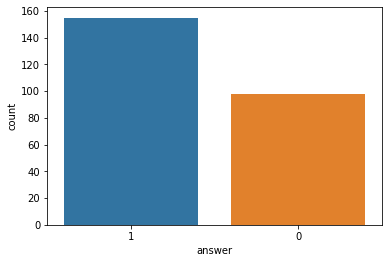

In [25]:
# On compte de nouveau nos radios du cerveau, mais avec un graphique.
dst = pd.DataFrame()
dst['answer'] = ['1'] * len(os.listdir(yes_dir)) + ['0'] * len(os.listdir(no_dir))
sns.countplot(x='answer', data=dst)

<div>Les radios ont désormais un numéro d'index, <br>
on peut donc en afficher un echantillon en les affichant à l'aide de leur numéro d'index.<br>
Pour l'instant, on ne fait que les afficher comme dans un site web , il n'y a aucun traitement !<br>
    NOTE : La 8ème photo " no " semble bien être une erreur d'appréciation ..<br>
</div>

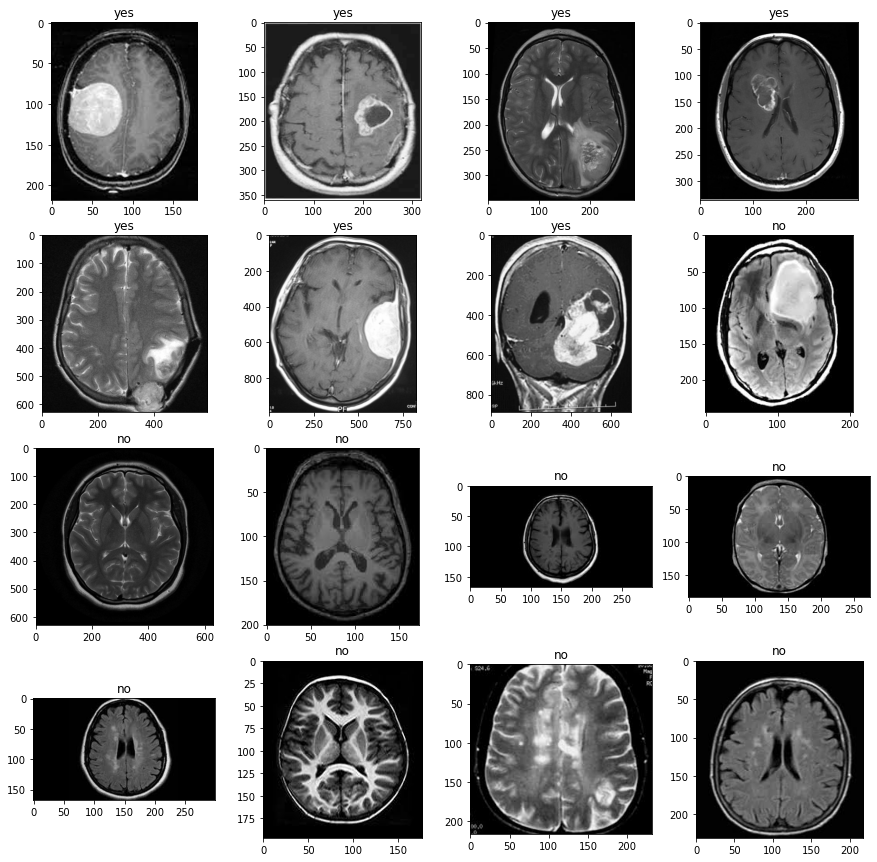

In [24]:
plt.figure(figsize=(15, 15))
plt.subplot(4, 4, 1)
plt.imshow(load_img(os.path.join(yes_dir , os.listdir(yes_dir)[0])))
plt.title('yes')
plt.subplot(4, 4, 2)
plt.imshow(load_img(os.path.join(yes_dir , os.listdir(yes_dir)[1])))
plt.title('yes')

plt.subplot(4, 4, 3)
plt.imshow(load_img(os.path.join(yes_dir , os.listdir(yes_dir)[2])))
plt.title('yes')

plt.subplot(4, 4, 4)
plt.imshow(load_img(os.path.join(yes_dir , os.listdir(yes_dir)[3])))
plt.title('yes')

plt.subplot(4, 4, 5)
plt.imshow(load_img(os.path.join(yes_dir , os.listdir(yes_dir)[4])))
plt.title('yes')

plt.subplot(4, 4, 6)
plt.imshow(load_img(os.path.join(yes_dir , os.listdir(yes_dir)[5])))
plt.title('yes')

plt.subplot(4, 4, 7)
plt.imshow(load_img(os.path.join(yes_dir , os.listdir(yes_dir)[6])))
plt.title('yes')

plt.subplot(4, 4, 8)
plt.imshow(load_img(os.path.join(yes_dir , os.listdir(yes_dir)[7])))
plt.title('no')

plt.subplot(4, 4, 9)
plt.imshow(load_img(os.path.join(no_dir , os.listdir(no_dir)[0])))
plt.title('no')
plt.subplot(4, 4, 10)
plt.imshow(load_img(os.path.join(no_dir , os.listdir(no_dir)[1])))
plt.title('no')

plt.subplot(4, 4, 11)
plt.imshow(load_img(os.path.join(no_dir , os.listdir(no_dir)[2])))
plt.title('no')

plt.subplot(4, 4, 12)
plt.imshow(load_img(os.path.join(no_dir , os.listdir(no_dir)[3])))
plt.title('no')

plt.subplot(4, 4, 13)
plt.imshow(load_img(os.path.join(no_dir , os.listdir(no_dir)[4])))
plt.title('no')

plt.subplot(4, 4, 14)
plt.imshow(load_img(os.path.join(no_dir , os.listdir(no_dir)[5])))
plt.title('no')

plt.subplot(4, 4, 15)
plt.imshow(load_img(os.path.join(no_dir , os.listdir(no_dir)[6])))
plt.title('no')

plt.subplot(4, 4, 16)
plt.imshow(load_img(os.path.join(no_dir , os.listdir(no_dir)[7])))
plt.title('no')
plt.show()

c'est vraiment un petit jeu de données et notre réseau ne peut tout simplement pas s'entraîner et nous montrer des résultats sympas car j'utilise la solution ready_made VGG16

In [30]:
base_dir = 'datasets/brain_tumor_dataset'

datagen = ImageDataGenerator(rescale=1/255,
                             rotation_range=20,
                             horizontal_flip=True,
                             height_shift_range=0.1,
                             width_shift_range=0.1,
                             shear_range=0.1,
                             brightness_range=[0.3, 1.5],
                             validation_split=0.2
                            )

train_gen= datagen.flow_from_directory(base_dir,
                                       target_size=(224,224),
                                       class_mode='binary',
                                       subset='training'
                                      )
val_gen = datagen.flow_from_directory( base_dir,
                                       target_size=(224,224),
                                       class_mode='binary',
                                       subset='validation'
                                      )

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


Note de Nicolas : Les résultats ne sont pas clairs, on ne voit pas le nom ou le numéro de la photo traitée : Modifier le code .

In [ ]:
from keras.models import *
from keras.layers import *

from keras.applications import VGG16

VGG = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (224,224, 3)
)

VGG.trainable = False
model = Sequential()
model.add(VGG)
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])


history = model.fit(
    train_gen,
    epochs = 20,
    batch_size = 32,
    validation_data = val_gen
)

plt.figure(figsize=(15, 15))

plt.subplot(2,2, 1)
sns.lineplot(data = history.history, x = range(20), y = 'val_accuracy')
sns.lineplot(data = history.history, x = range(20), y = 'accuracy')
plt.legend()

plt.subplot(2,2, 2)
sns.lineplot(data = history.history, x = range(20), y = 'val_loss')
sns.lineplot(data = history.history, x = range(20), y = 'loss')
plt.legend()

from keras import optimizers

VGG.trainable = True
set_trainable = False

for layer in VGG.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

from keras import optimizers

model.compile(
    optimizer = optimizers.RMSprop(lr = 1e-5),
    loss = 'binary_crossentropy',
    metrics= ['accuracy']
)

history = model.fit(
    train_gen,
    batch_size = 20,
    epochs = 30,
    validation_data = val_gen
)

plt.subplot(2,2, 3)
sns.lineplot(data = history.history, x = range(30), y = 'val_accuracy')
sns.lineplot(data = history.history, x = range(30), y = 'accuracy')
plt.legend()

plt.subplot(2,2, 4)
sns.lineplot(data = history.history, x = range(30), y = 'val_loss')
sns.lineplot(data = history.history, x = range(30), y = 'loss')
plt.legend()